# Problem_1

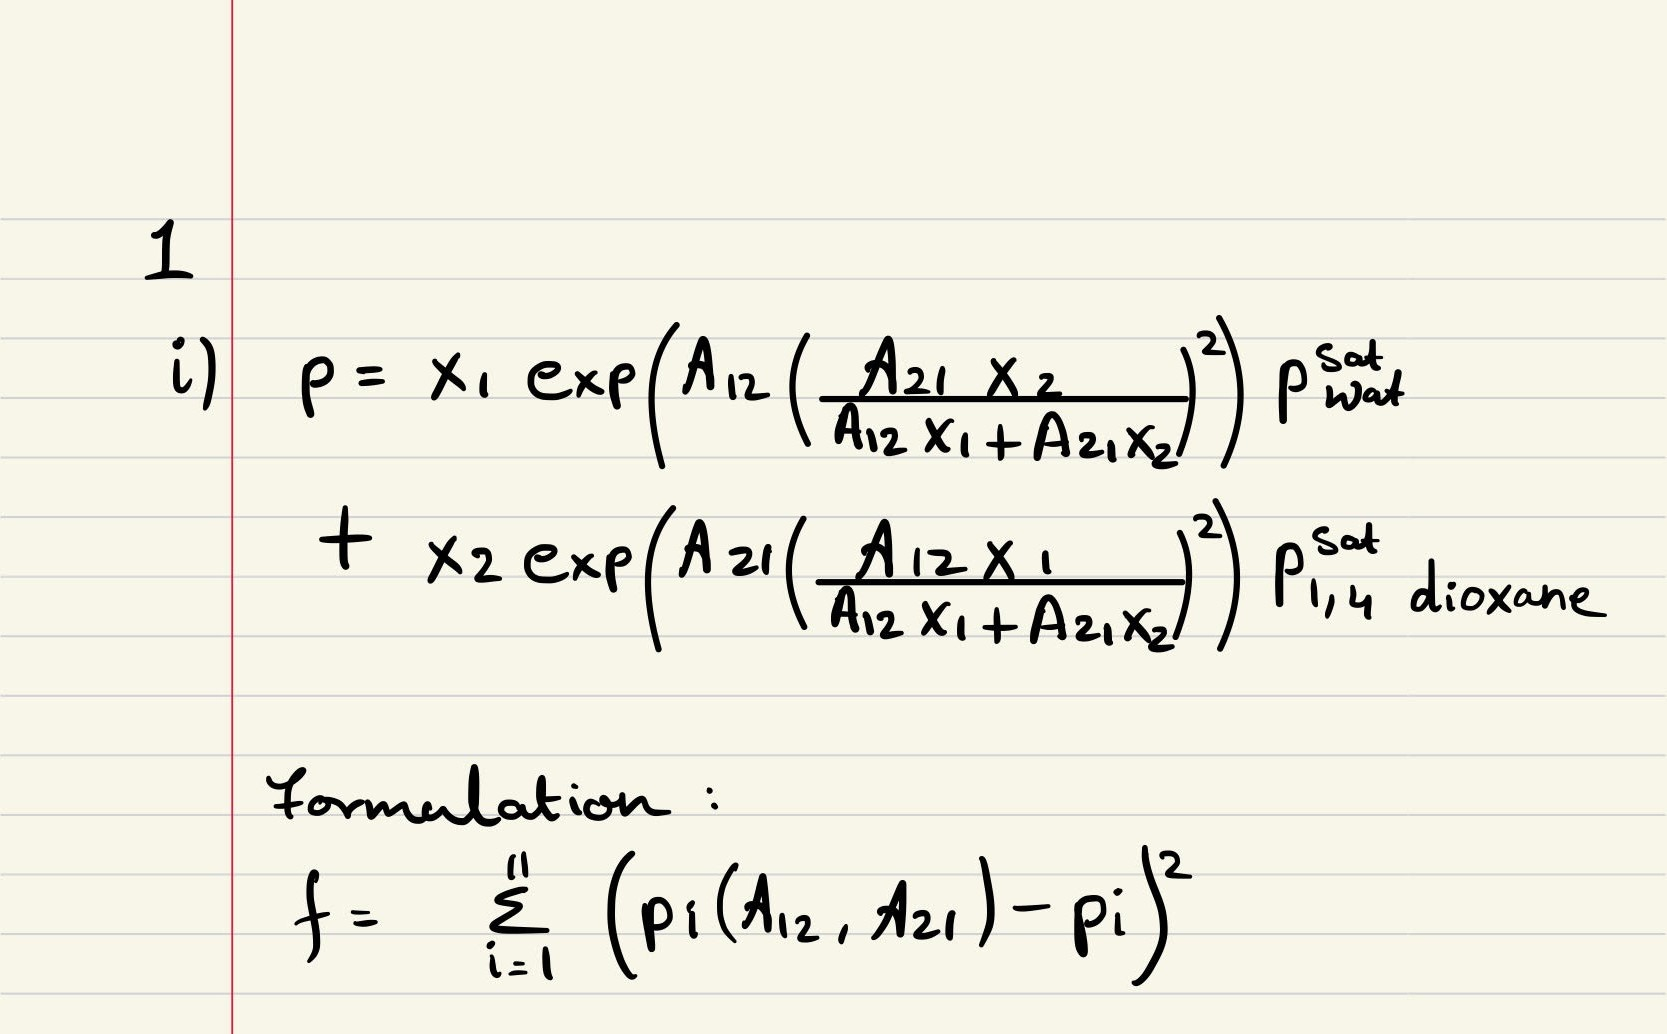

[1.9584178 1.6891868]
0.00071549066
P_Optimised 1  = 28.824099527405245
P_measured 1  = 28.1
Error  P 1 value = -0.7240995274052437
P_Optimised 2  = 34.64431172371921
P_measured 2  = 34.4
Error  P 2 value = -0.24431172371921406
P_Optimised 3  = 36.45296597609965
P_measured 3  = 36.7
Error  P 3 value = 0.24703402390035478
P_Optimised 4  = 36.86731324695646
P_measured 4  = 36.9
Error  P 4 value = 0.03268675304353508
P_Optimised 5  = 36.87400644103766
P_measured 5  = 36.8
Error  P 5 value = -0.07400644103766041
P_Optimised 6  = 36.74983464830966
P_measured 6  = 36.7
Error  P 6 value = -0.04983464830965545
P_Optimised 7  = 36.3904500350543
P_measured 7  = 36.5
Error  P 7 value = 0.10954996494569968
P_Optimised 8  = 35.38482355380221
P_measured 8  = 35.4
Error  P 8 value = 0.015176446197791904
P_Optimised 9  = 32.947786549186844
P_measured 9  = 32.9
Error  P 9 value = -0.04778654918684566
P_Optimised 10  = 27.730002092297866
P_measured 10  = 27.7
Error  P 10 value = -0.030002092297866767
P_

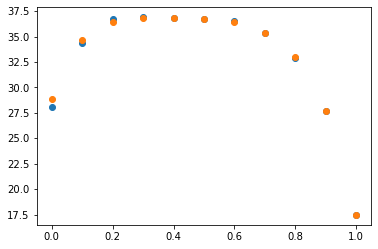

In [40]:
from matplotlib import pyplot
import torch as t
from torch.autograd import Variable
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math as m

x1=np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
x2= 1 - (x1)
p_i=np.array([28.1,34.4,36.7,36.9,36.8,36.7,36.5,35.4,32.9,27.7,17.5])

T=20
aw1=8.07131
aw2=1730.63
aw3=233.426

ad1=7.43155
ad2=1554.679
ad3=240.337

lpw= aw1 - (aw2/(T+aw3))
Psat_water= 10 ** lpw

lpd= ad1 - (ad2/(T+ad3))
Psat_dioxane= 10 ** lpd

x = Variable(t.tensor([1.0, 1.0]), requires_grad=True)
s = 0.001


res = []

for i in range(100):  
    for i in range(0,11):        
        loss = (((x1[i]*t.exp(x[0]*((x[1]*x2[i])/(x[0]*x1[i]+x[1]*x2[i]))**2)*Psat_water) + (x2[i]*t.exp( x[1]*((x[0]*x1[i])/(x[0]*x1[i]+x[1]*x2[i]))**2)*Psat_dioxane)) - p_i[i])**2    
        loss.backward()
    x.grad.numpy()
    with t.no_grad():
       x -= s * x.grad       
       x.grad.zero_()       
print(x.data.numpy())
print(loss.data.numpy())
for i in range(0,11):
  P_opt = ((x1[i]*m.exp(x[0]*((x[1]*x2[i])/(x[0]*x1[i]+x[1]*x2[i]))**2)*Psat_water) + (x2[i]*m.exp( x[1]*((x[0]*x1[i])/(x[0]*x1[i]+x[1]*x2[i]))**2)*Psat_dioxane))
  print("P_Optimised",i+1," =",P_opt)
  print("P_measured",i+1," =", p_i[i])
  print("Error  P",i+1,"value =" , p_i[i]-P_opt)
  res.append(P_opt)

#print (res)
pyplot.scatter(x1,p_i)
pyplot.scatter(x1,res)
pyplot.show()



# Problem_2 Bayesian Optimisation

In [32]:

from bayes_opt import BayesianOptimization
from matplotlib import pyplot

def function(a, b):
    return -((4-2.1*a**2+(a**4)/3)*a**2+a*y+(-4+4*b**2)*b**2)
pbounds = {'a': (-3, 3), 'b': (-2, 2)}

optimizer = BayesianOptimization(f=function,pbounds=pbounds,random_state=1)

optimizer.maximize(init_points=2,n_iter=15)
print(optimizer.max)



|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  0.265    | -0.4979   |  0.8813   |
|  2        | -110.1    | -2.999    | -0.7907   |
|  3        | -0.4933   | -0.3849   |  1.039    |
|  4        | -0.2833   |  1.599    | -0.5696   |
|  5        | -162.9    |  3.0      |  2.0      |
|  6        | -47.77    |  0.3665   | -2.0      |
|  7        | -150.9    |  3.0      | -2.0      |
|  8        | -0.7638   |  0.4683   | -0.02769  |
|  9        | -48.27    | -2.043    |  2.0      |
|  10       | -2.236    |  1.314    |  0.6422   |
|  11       | -50.26    |  0.5766   |  2.0      |
|  12       | -52.97    | -1.299    | -2.0      |
|  13       | -1.06     | -0.7025   | -0.5363   |
|  14       | -7.993    |  2.197    |  0.07143  |
|  15       | -48.19    | -0.8016   |  2.0      |
|  16       | -1.426    | -1.507    |  0.2863   |
|  17       | -107.6    | -3.0      |  1.181    |
{'target': 0.2650082867644827, 'params': {'x': -0.

In [ ]:
Scrap

In [26]:
T=20
aw1=8.07131
aw2=1730.63
aw3=233.426

ad1=7.43155
ad2=1554.679
ad3=240.337

lpw= aw1 - (aw2/(T+aw3))
Psat_water= 10 ** lpw

lpd= ad1 - (ad2/(T+ad3))
Psat_dioxane= 10 ** lpd

print (Psat_water)



